In [166]:
%run -n main.py
%matplotlib inline

In [108]:
events = list(parse_afishas())

3 subsection section маневрирование и сдалом, Воздухоплавательный спорт, Основной состав
3 subsection section трамплина, Водно-моторный спорт, Основной состав
3 subsection section R6, Регби, Основной состав


In [177]:
%run -n main.py
data = make_table(events)
data.head()

,section,subsection,title,description,start,stop,address,participants
0,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-01-18,2008-01-20,"Россия, Тульская обл. Алексин",40
1,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-08,2008-02-10,"Россия, Приморский край Владивосток",30
2,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-02-22,2008-02-24,"Россия, Тульская обл. Алексин",50
3,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушного боя F-2D этап,2008-02-22,2008-02-24,"Россия, Свердловская обл. Екатеринбург",100
4,Авиамодельный спорт,Основной состав,Кубок россии,кордовые модели воздушногобоя F2D этап,2008-03-01,2008-03-02,"Россия, Пермская обл. Пермь",40


# Изменение числа мероприятий

Для некоторых видов наблюдаются тренды в числе мероприятий:
- Сильно растёт спорт для инваливод (лиц с поражением ОДА) и автомобильный спорт
- Слегка растёт мотоциклетный спорт, дзюдо, самбо, парусный спорт, волейбол, тхэквондо, бадминтон
- У футбола какой-интересный тренд
- Бокс перестал расти в 2012 году
- Надо отметить что падения числа мероприятий нигде не наблюдается

Иногда есть периодичность в число мероприятий, что не удивительно:
- Парусный спорт, конные спорт, авиамодельный спорт, велоспорт  замирают зимой
- Вообще зимой у многих видов затишье. Но бывает и наоборот, например, во фристайле
- Интересный рисунок у тенниса и лёгкой атлетики, который повторяется каждый год

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1341a5c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13258abd0>]], dtype=object)

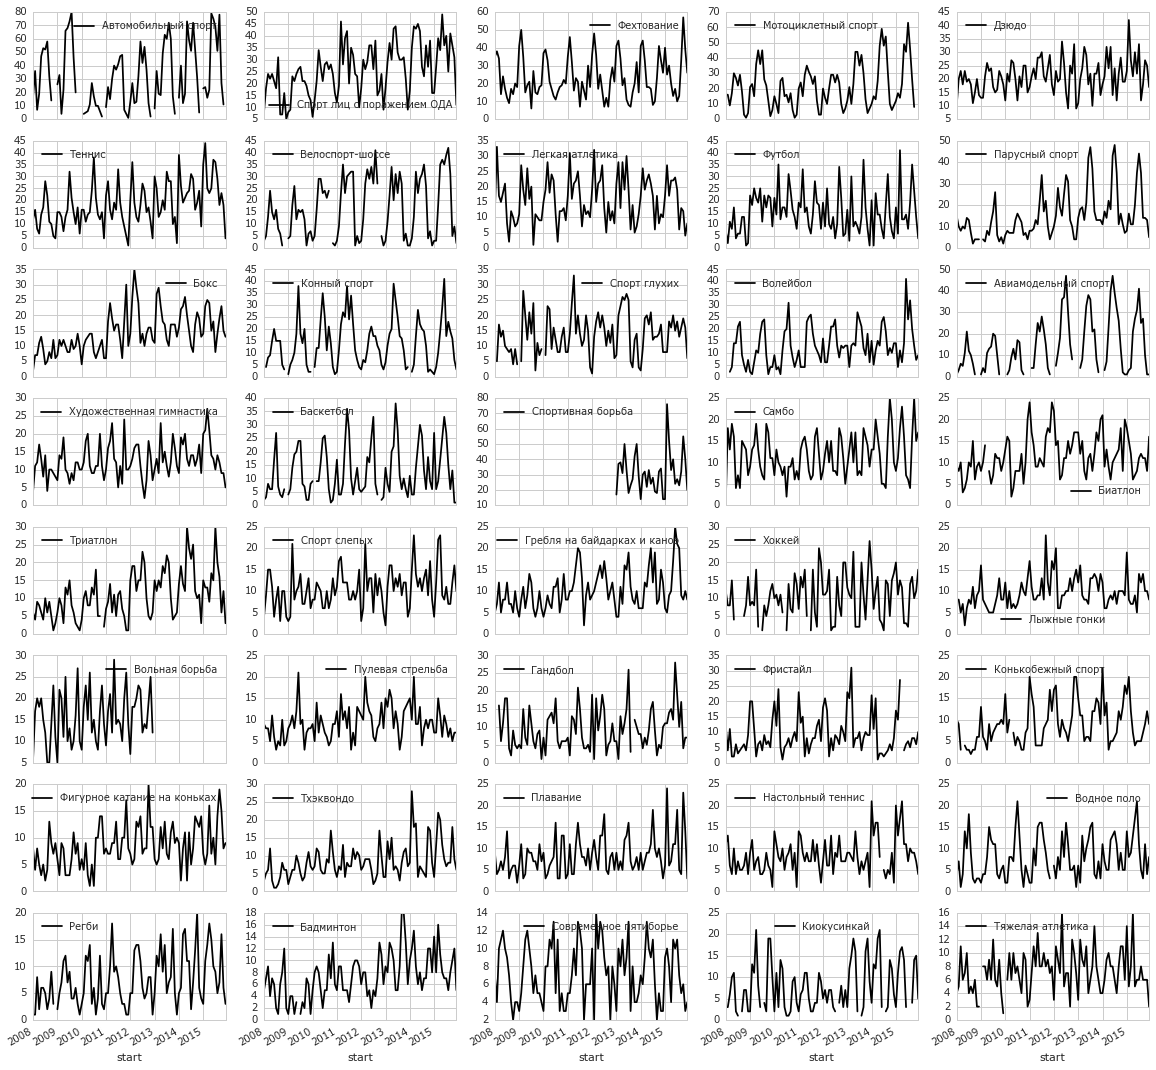

In [191]:
table = data.groupby('section').size()
table = table.sort(inplace=False, ascending=False)
order = table.head(40).index

table = data.groupby(['start', 'section']).size()
table = table.unstack()
table = table[order]
table = table.resample('M', how='sum')
table.plot(subplots=True, layout=(8, 5), figsize=(20, 20))

# Доля мероприятий на территории России

Для некоторые видов интересно посмотреть на долю мероприятий, которые проходят в России:
- Доля мероприятий в России для спорта для инвалидов и для художественной гимнастики немного растёт
- Интересный тренд для настольного тенниса
- Какого-то падения в 2014 и 2015 годах в связи с кризисов не видно
- Наблюдается периодичность для гребли на байдарках

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131409b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13d397710>]], dtype=object)

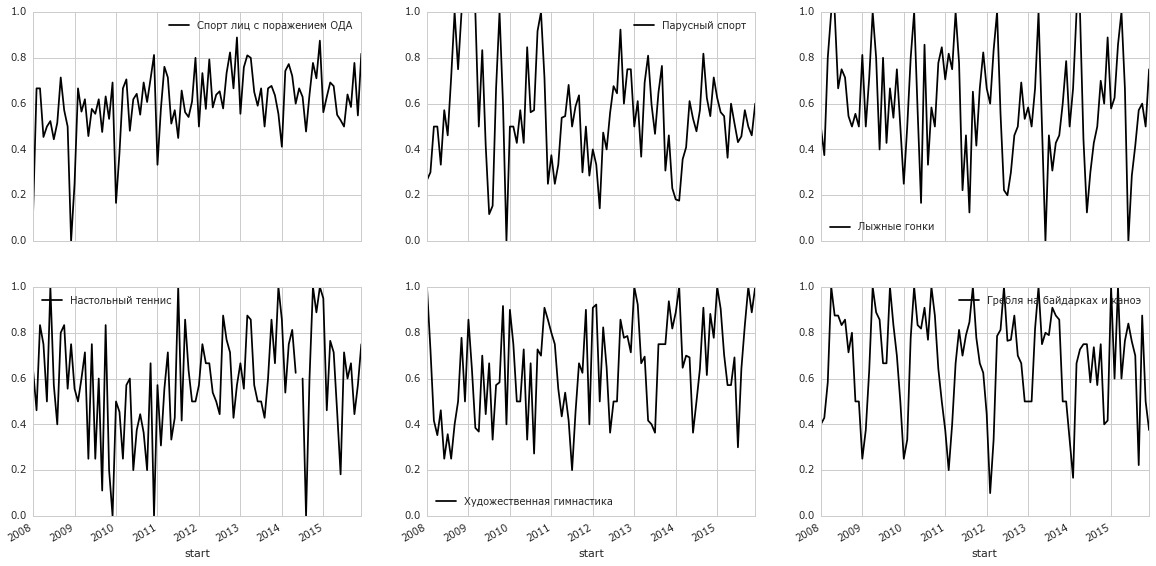

In [228]:
table = data.copy()
table['russia'] = table.address.str.contains(u'Россия')
table = table.groupby(['start', 'section', 'russia']).size()
table = table.unstack().unstack()
table = table.resample('M', how='sum')
table = table.stack()
table = table.fillna(0)
table = table[True] / (table[True] + table[False])
table = table.unstack()
table = table[[u'Спорт лиц с поражением ОДА',
               u'Парусный спорт',
               u'Лыжные гонки',
               u'Настольный теннис',
               u'Художественная гимнастика',
               u'Гребля на байдарках и каноэ']]
table.plot(subplots=True, layout=(2, 3), figsize=(20, 10), ylim=(0, 1))